In [27]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.plot_gradient import *
from functions_old.multi_gradient_descent import *
from math import log

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    m = x.shape[0]
    for i in range(x.shape[0]):
        if y[i] ==1:
            k -= (1/m)*np.log(fun(x[i],w,b))
        if y[i] ==0:
            k -= (1/m)*(np.log(1-fun(x[i],w,b)))
    return k
def compute_gradient(x,y,w,b):
    lambda_ = 0.03
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for refualrization
    for j in range(x.shape[1]):
        dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    hist = []
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        k  =cost(x,y,w,b)
        hist.append([i,k])
        if i%1000 ==0:
            # print(w,b,"-------------------------------- cost: ",cost(x,y,w,b))
            print("itreation: ",i,"-------------------------------- cost: ",k)
            pass
    return w,b,hist





In [29]:
def map_feature(X1, X2,degree=6):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    ls = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            ls.append((X1**(i-j) * (X2**j)))
    return np.stack(ls, axis=1)

In [30]:
data = np.loadtxt("C:\code\ml\Coursera\material\C1 - Supervised Machine Learning - Regression and Classification\week3\C1W3A1\data\ex2data2.txt",delimiter = ',')
print(data[0:5])
x_train = data[:,:2]
y_train = data[:,2]
# x_train = np.array([[x,y,x**2,y**2] for x,y in list(x_train)])
# x_train = np.c_[x_train[:,0],x_train[:,1],x_train[:,0]**2,x_train[:,1]**2,x_train[:,0]**3,x_train[:,1]**3]
x_train = map_feature(x_train[:,0],x_train[:,1])
# print(x_train)
# y_train

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


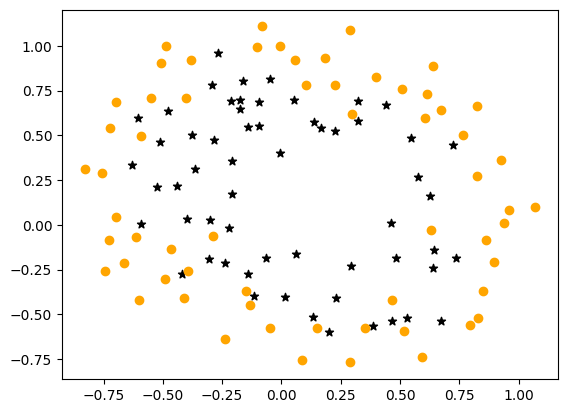

In [31]:
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
    else:
        pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        
pl.show()

In [32]:

X = feature_scaling(x_train)
# y_train = feature_scaling(y_train)

In [33]:
per_w,per_b,hist = logistic_descent(X,y_train,10,2500)
hist = np.array(hist)
print(per_w,per_b)

itreation:  0 -------------------------------- cost:  0.6925329427857453
itreation:  1000 -------------------------------- cost:  0.49539984163762335
itreation:  2000 -------------------------------- cost:  0.4377455817206861
[ 1.40448032  2.38901296 -2.79284268 -1.60026404 -2.02012509  0.34030034
  0.16718666 -0.3091011  -0.11748311 -2.08317048 -0.21476036 -1.50500502
 -0.51271311 -1.88603265 -0.26940147 -0.19372895  0.17651864 -0.41026986
 -0.49317741 -0.79472973 -1.45789375  0.03996503 -1.31551585  0.03460472
 -1.22968406 -0.27703756 -1.48899276] -0.20303218940085804


In [34]:
# good values at cost 0.28
# [  0.39664464   5.37172645  -4.10272205  -5.69348236  -1.19712926
#    7.11766681  12.47982926  21.72942956   5.11933198  -0.42590879
#   -3.87492642   5.2134271   -6.1019243  -22.82453656   1.98800004
#   -4.80822942   6.55607643  -0.8712463  -21.65766905   9.27194633
#  -34.28011989  -7.86397389  -4.56595912   7.29856087 -27.41739458
#  -28.04650768  -5.14905925] -1.9859311381516982

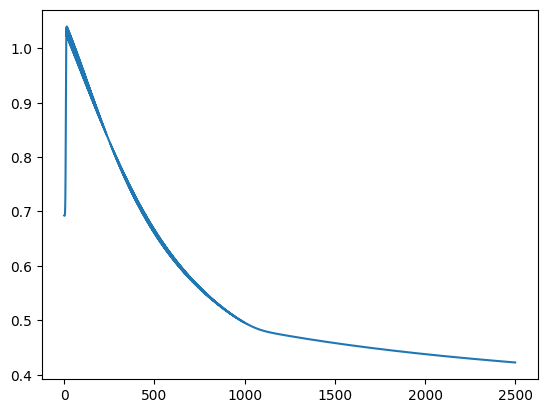

In [35]:
pl.plot(hist[:,0],hist[:,1])
pl.show()

In [36]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        for j in range(n): 
            z_wb += 0
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb>0.5 else 0
        
    return p

In [37]:
pred = predict(X,per_w,per_b)
print('Train Accuracy: %f'%(np.mean(pred == y_train) * 100))

Train Accuracy: 82.203390


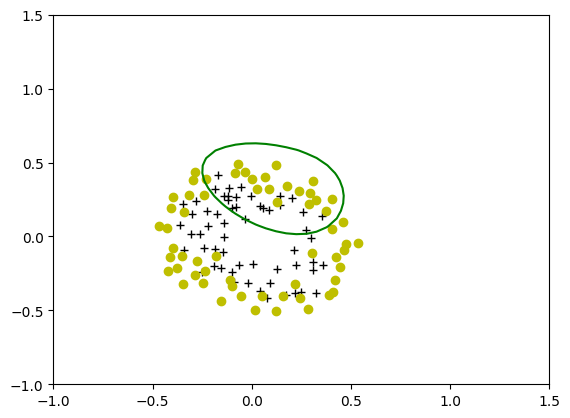

In [38]:
plot_decision_boundary(per_w,per_b,X,y_train)

In [39]:

# for i in range(y_train.shape[0]):
#     if y_train[i] == 1:
#         pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
#     else:
#         pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        

# x1 = np.linspace(-1, 1.5, 50)
# x2 = np.linspace(-1, 1.5, 50)
# for i in range(x1.shape[0]):
#     for j in range(x2.shape[0]):
#         k = np.dot(map_feature(x1[i],x2[j])[0],per_w) +per_b
#         if int(k) == 0:
#             print(k)
#             pl.scatter(x1[i],x2[j],color='blue')
# pl.show()